In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import time
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data
from localgraphclustering import *

import sys
sys.path.append("../")
    
from affinity_kimon import affinity
from skimage.color import rgb2gray
from skimage import data, segmentation, color
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from skimage.future import graph
from skimage.segmentation import mark_boundaries
from skimage.io import imread
from skimage import data

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import networkx as nx

import warnings
warnings.filterwarnings('ignore')

## Image exaple in intro

In [2]:
from skimage import data
img = data.astronaut()
# img = rescale(img, 0.4)
# img = rescale(img, 0.2)
[m,n] = img.shape[0:2]
n_pixels = m*n

In [3]:
# data, row, col = affinity(n_pixels,m,n,30.0,1.0e-2,max(m,n)/1.0e+1,0,img.astype(float))
# A = sp.sparse.csc_matrix((data, (row, col)), shape=(n_pixels, n_pixels))
data, row, col = affinity(n_pixels,m,n,80.0,7.0e+1,max(m,n)/1.0e+1,0.0,img.astype(float))
A = sp.sparse.csc_matrix((data, (row, col)), shape=(n_pixels, n_pixels))

In [4]:
g = GraphLocal()
g = g.from_sparse_adjacency(A)
g.is_disconnected()

There are  1  connected components in the graph
The graph is not a disconnected graph.


False

## Image exampple intro MQI

In [5]:
from skimage import data
img = data.astronaut()
# img = rescale(img, 0.4)
# img = rescale(img, 0.2)
[m,n] = img.shape[0:2]
n_pixels = m*n

In [6]:
# data, row, col = affinity(n_pixels,m,n,30.0,1.0e-2,max(m,n)/1.0e+1,0,img.astype(float))
# A = sp.sparse.csc_matrix((data, (row, col)), shape=(n_pixels, n_pixels))
data, row, col = affinity(n_pixels,m,n,80.0,7.0e+2,max(m,n)/1.0e+1,0.0,img.astype(float))
A = sp.sparse.csc_matrix((data, (row, col)), shape=(n_pixels, n_pixels))

In [7]:
g = GraphLocal()
g = g.from_sparse_adjacency(A)
g.is_disconnected()

There are  1  connected components in the graph
The graph is not a disconnected graph.


False

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


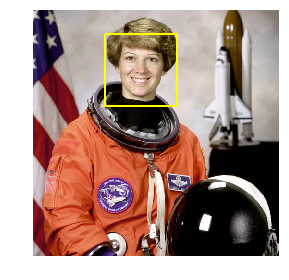

In [8]:
input_cluster = []

howmany = 30

for i in range(50,200):
    for j in range(150,300):
        pixel = i*n + j
        input_cluster.append(pixel)

labels = np.zeros(n_pixels, dtype=int)
labels[input_cluster] = 1

f, ax = plt.subplots(1)
plt.imshow(mark_boundaries(img, labels.reshape((m,n)), mode='thick', color = [255,255,0], outline_color=[255,255,0]))

plt.axis('off')
plt.tight_layout()

f.savefig('/Users/kimonfountoulakis/Desktop/BoxSync/University/Waterloo/assistantProfessor/papers/flowpaper/figures/astronaut_boundaries_input_mqi.pdf', format='pdf',bbox_inches='tight')

In [9]:
output_mqi = flow_clustering(g,input_cluster,method="mqi_weighted")

print("Conductance for spectral: ", g.compute_conductance(input_cluster))
print("Improved conductance for MQI: ", output_mqi[1])

Conductance for spectral:  0.053432305661802806
Improved conductance for MQI:  0.0016499219483343706


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


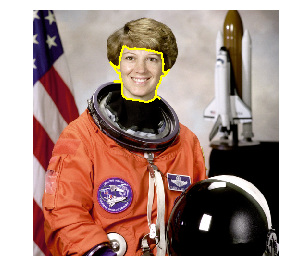

In [10]:
labels_mqi = np.zeros(n_pixels, dtype=int)
labels_mqi[output_mqi[0]] = 1

f, ax = plt.subplots(1)
plt.imshow(mark_boundaries(img, labels_mqi.reshape((m,n)), mode='thick', color = [255,255,0], outline_color=[255,255,0]))

plt.axis('off')
plt.tight_layout()

f.savefig('/Users/kimonfountoulakis/Desktop/BoxSync/University/Waterloo/assistantProfessor/papers/flowpaper/figures/astronaut_boundaries_mqi.pdf', format='pdf',bbox_inches='tight')

## Image exampple intro SimpleLocal

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


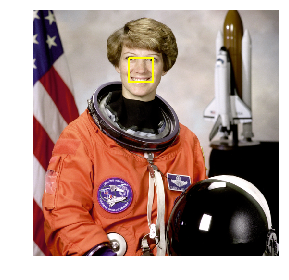

In [11]:
input_cluster = []

howmany = 30

for i in range(100,150):
    for j in range(200,250):
        pixel = i*n + j
        input_cluster.append(pixel)

labels = np.zeros(n_pixels, dtype=int)
labels[input_cluster] = 1

f, ax = plt.subplots(1)
plt.imshow(mark_boundaries(img, labels.reshape((m,n)), mode='thick', color = [255,255,0], outline_color=[255,255,0]))

plt.axis('off')
plt.tight_layout()

f.savefig('/Users/kimonfountoulakis/Desktop/BoxSync/University/Waterloo/assistantProfessor/papers/flowpaper/figures/astronaut_boundaries_input_sl.pdf', format='pdf',bbox_inches='tight')

In [12]:
output_sl = flow_clustering(g,input_cluster,method="sl_weighted",delta=0.3)

print("Conductance for spectral: ", g.compute_conductance(input_cluster))
print("Improved conductance for SL: ", output_sl[1])

Conductance for spectral:  0.11137627145617801
Improved conductance for SL:  0.001650045746050057


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


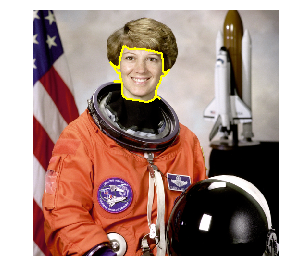

In [13]:
labels_sl = np.zeros(n_pixels, dtype=int)
labels_sl[output_sl[0]] = 1

f, ax = plt.subplots(1)
plt.imshow(mark_boundaries(img, labels_sl.reshape((m,n)), mode='thick', color = [255,255,0], outline_color=[255,255,0]))

plt.axis('off')
plt.tight_layout()

f.savefig('/Users/kimonfountoulakis/Desktop/BoxSync/University/Waterloo/assistantProfessor/papers/flowpaper/figures/astronaut_boundaries_mqi.pdf', format='pdf',bbox_inches='tight')